In [28]:
import pandas as pd
import math
import random
# from matplotlib.cm import binary
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from sklearn.datasets import fetch_openml
# from sklearn.ensemble  import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn import svm
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier, LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,precision_recall_curve
# from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit,cross_val_predict
# from sklearn.metrics import accuracy_score,mean_squared_error
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from statsmodels.graphics.mosaicplot import mosaic
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
%matplotlib inline

In [5]:
df = pd.read_csv('Diabetes.csv',names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

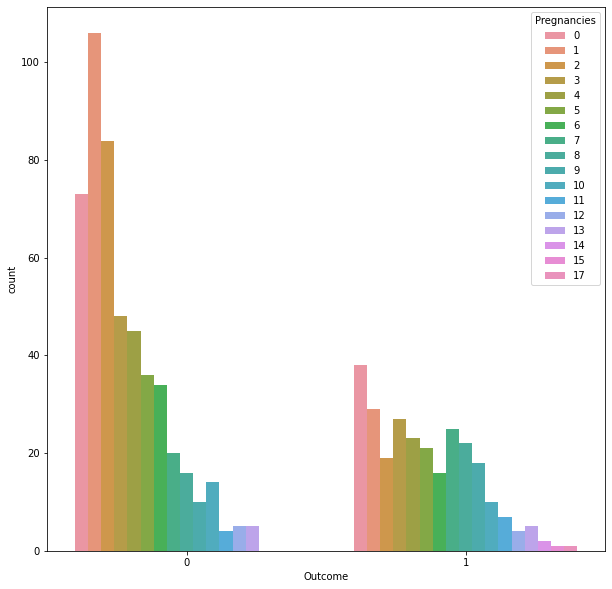

In [11]:
plt.rcParams['figure.figsize'] = (10,10)
sns.countplot(x='Outcome',hue='Pregnancies',data=df)

(<Figure size 720x720 with 3 Axes>,
 {('1', '21'): (0.0, 0.0, 0.34722222222222215, 0.015945911468299528),
  ('1', '22'): (0.0,
   0.018794914317302378,
   0.34722222222222215,
   0.03508100523025896),
  ('1', '23'): (0.0,
   0.05672492239656419,
   0.34722222222222215,
   0.02232427605561934),
  ('1', '24'): (0.0,
   0.08189820130118637,
   0.34722222222222215,
   0.025513458349279247),
  ('1', '25'): (0.0,
   0.11026066249946848,
   0.34722222222222215,
   0.04464855211123869),
  ('1', '26'): (0.0,
   0.15775821745971003,
   0.34722222222222215,
   0.025513458349279226),
  ('1', '27'): (0.0,
   0.1861206786579921,
   0.34722222222222215,
   0.025513458349279247),
  ('1', '28'): (0.0,
   0.21448313985627418,
   0.34722222222222215,
   0.031891822936599055),
  ('1', '29'): (0.0,
   0.2492239656418761,
   0.34722222222222215,
   0.0414593698175788),
  ('1', '30'): (0.0,
   0.29353233830845776,
   0.34722222222222215,
   0.019135093761959442),
  ('1', '31'): (0.0,
   0.31551643491942005,


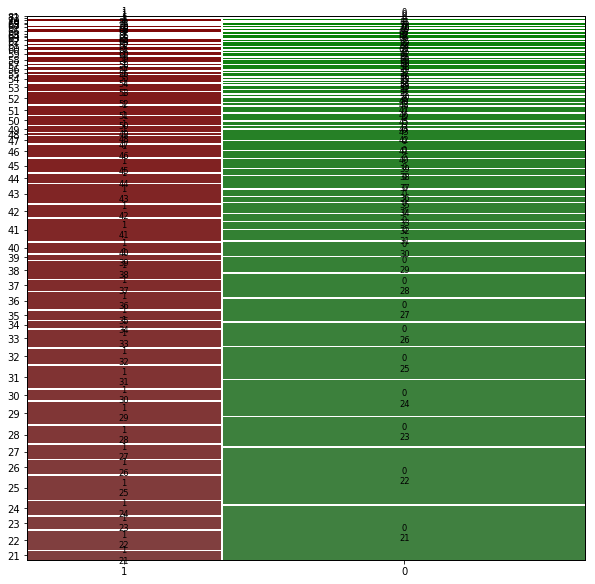

In [20]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(df.sort_values(by='Age'),['Outcome','Age'])

In [29]:
train_data,test_data,labels_train,labels_test = train_test_split(df.drop("Outcome",axis=1),df['Outcome'],test_size=0.3,random_state=42)
model = SVC()
model.fit(train_data,labels_train)

SVC()

In [30]:
pred_svc = model.predict(test_data)
classification_report(labels_test,pred_svc)

'              precision    recall  f1-score   support\n\n           0       0.76      0.87      0.81       151\n           1       0.66      0.49      0.56        80\n\n    accuracy                           0.74       231\n   macro avg       0.71      0.68      0.69       231\nweighted avg       0.73      0.74      0.72       231\n'